<a href="https://colab.research.google.com/github/Tejashvi2215/Covid-19InIndiaAnalysis-Visualization-Tableau-/blob/main/Employee_Attrition_Prediction_using_all_ML_models_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Employee Attrition Predict Using all ML models

Explorartory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix, accuracy_score, auc,roc_curve, roc_auc_score, precision_recall_curve
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Load the data
data = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


What can we deduce about the data
First, let's summarize our data by row, column, features, unique, and missing values,

In [ ]:
print("Rows : " ,data.shape[0])
print("Columns : " ,data.shape[1])
print("\nFeatures : \n" ,data.columns.tolist())
print("\nUnique values : \n",data.nunique())
print("\nMissing values : ", data.isnull().sum().values.sum())

Rows :  1470
Columns :  35

Features : 
 ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Unique values : 
 Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber          

In [ ]:
#Let's explore some other details like the datatype of each feature, summary statistics for numerical columns.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Let's Explore Visually
To view correlation between values

The relationship between the features is depicted in the correlation heatmap above.

Monthly Income has a strong positive correlation with Job Level. This means the higher job levels usually have a higher monthly income.
Performance rating has a positive correlation with Percent Salary Hike. This means that an increase in salary is related with an increase in performance.
Total Working years has a positive correlation with the employee's age, Job Level, and Monthly Income. This is understandable as you gain more experience in years and salary increases as you age.

<Axes: >

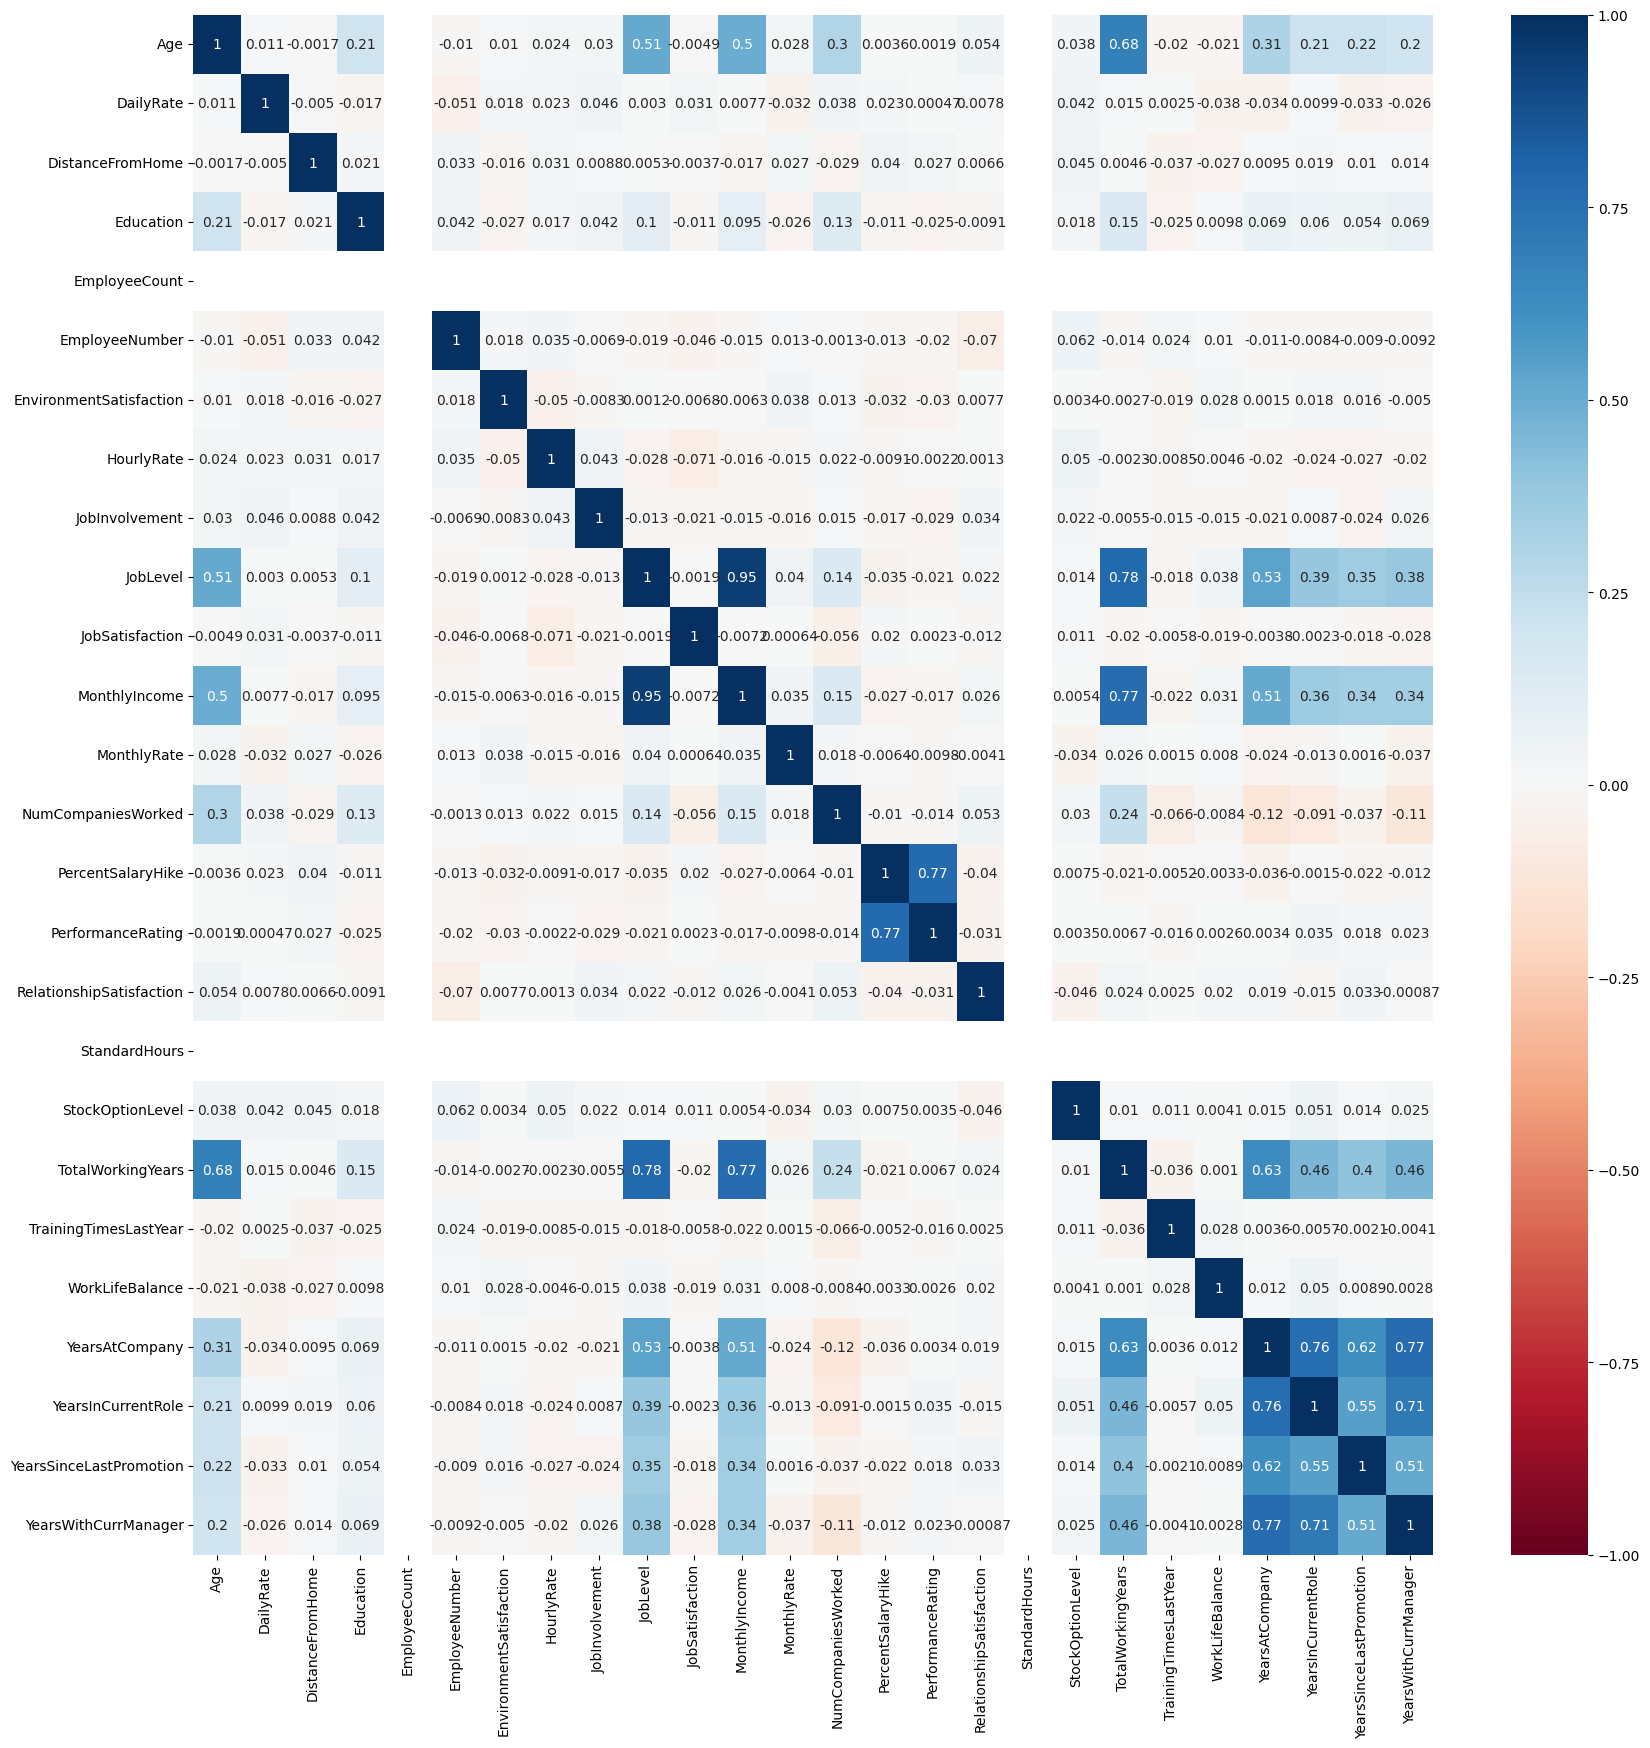

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), vmax=1, vmin=-1, cmap='RdBu', annot=True)

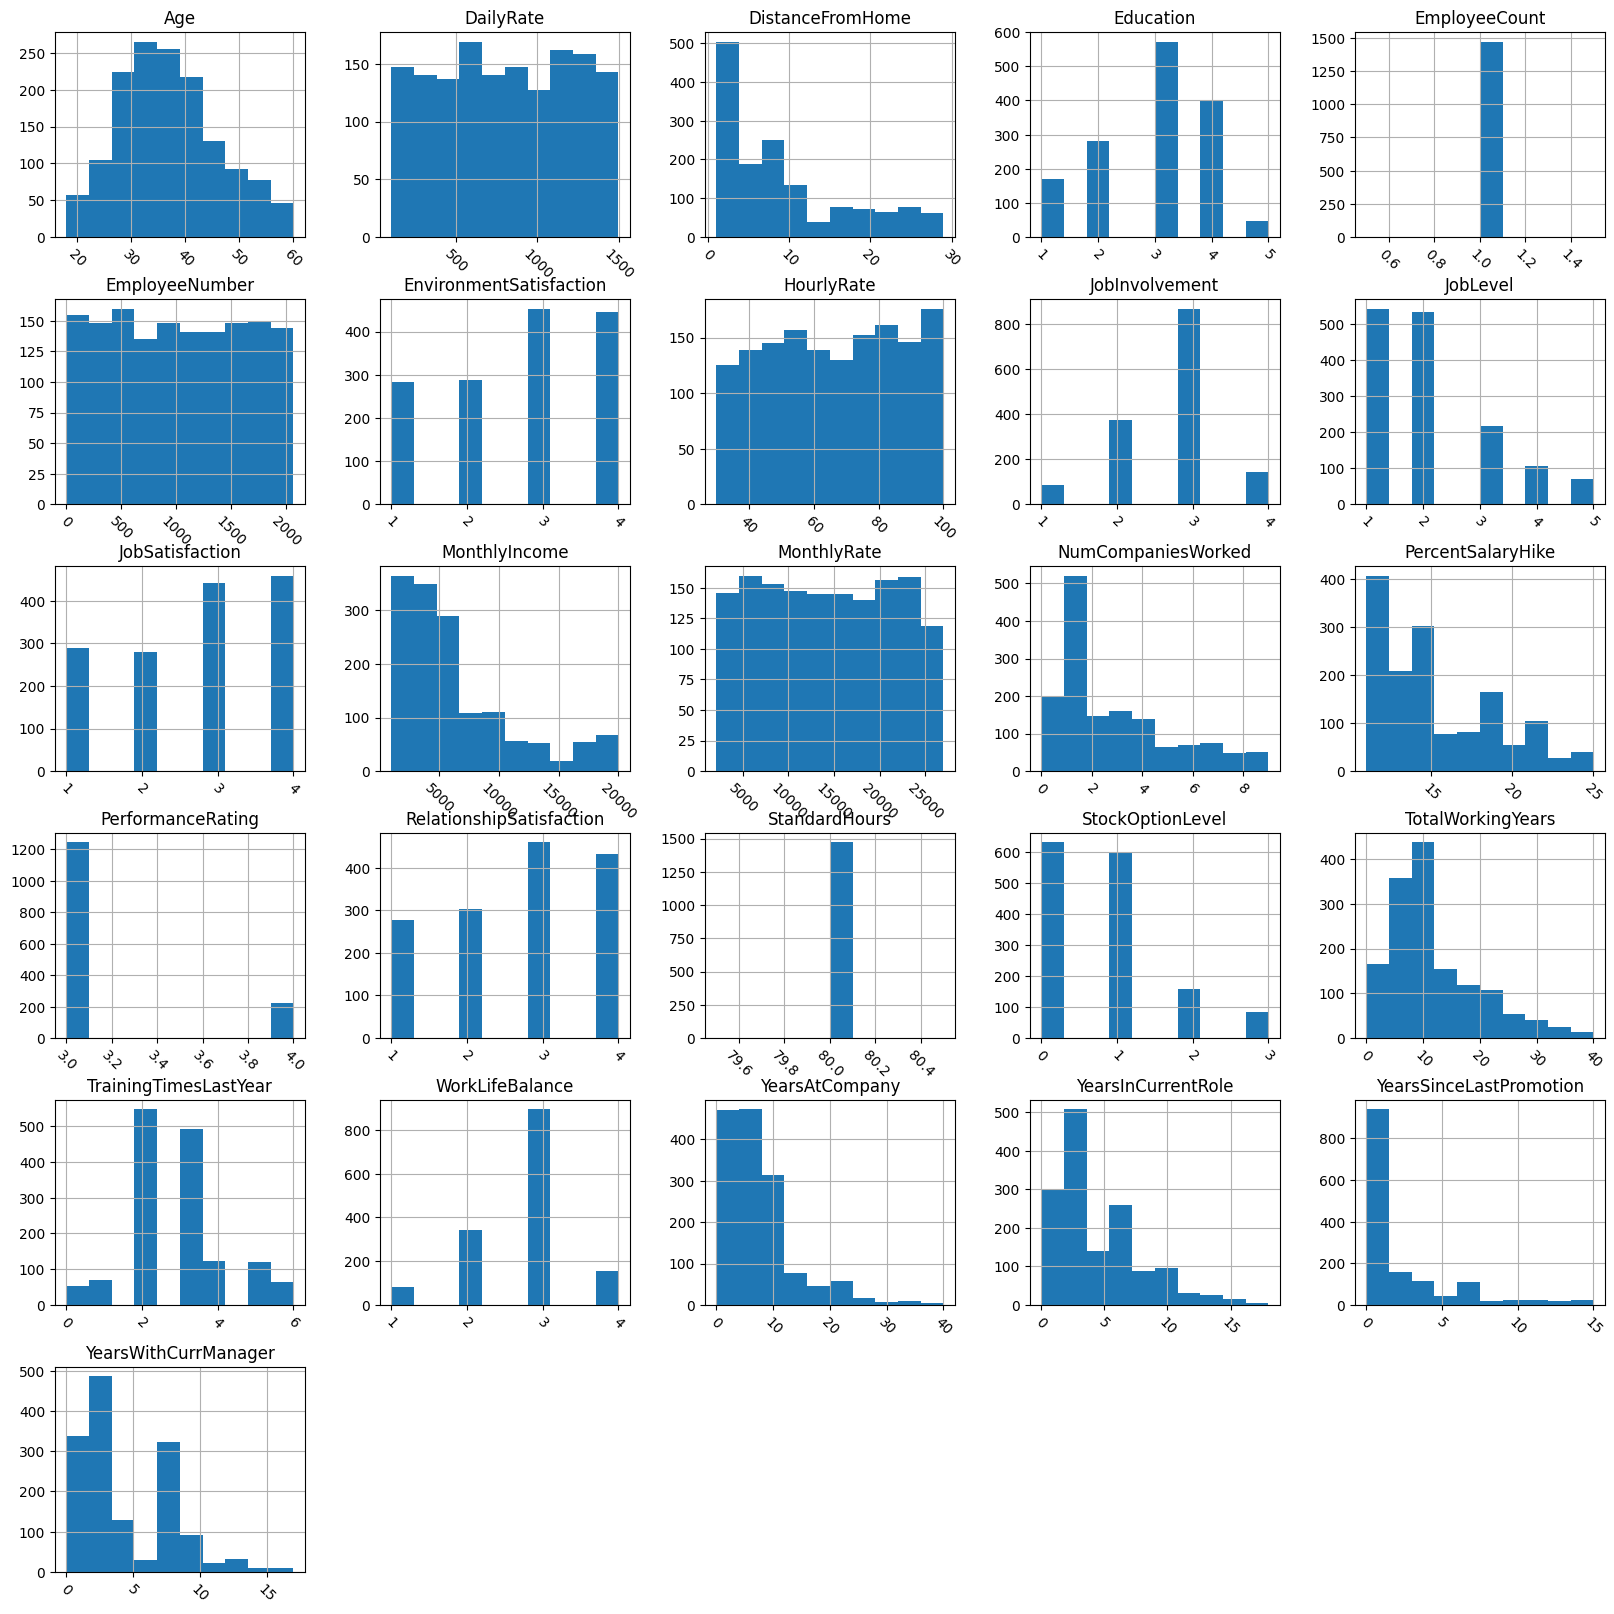

In [ ]:
data.hist(figsize=(20, 20), xrot=-45)
plt.show()

The graph above show the distribution of features in the dataset using histograms. Age follows a normal distribution while other features do not.

<Axes: >

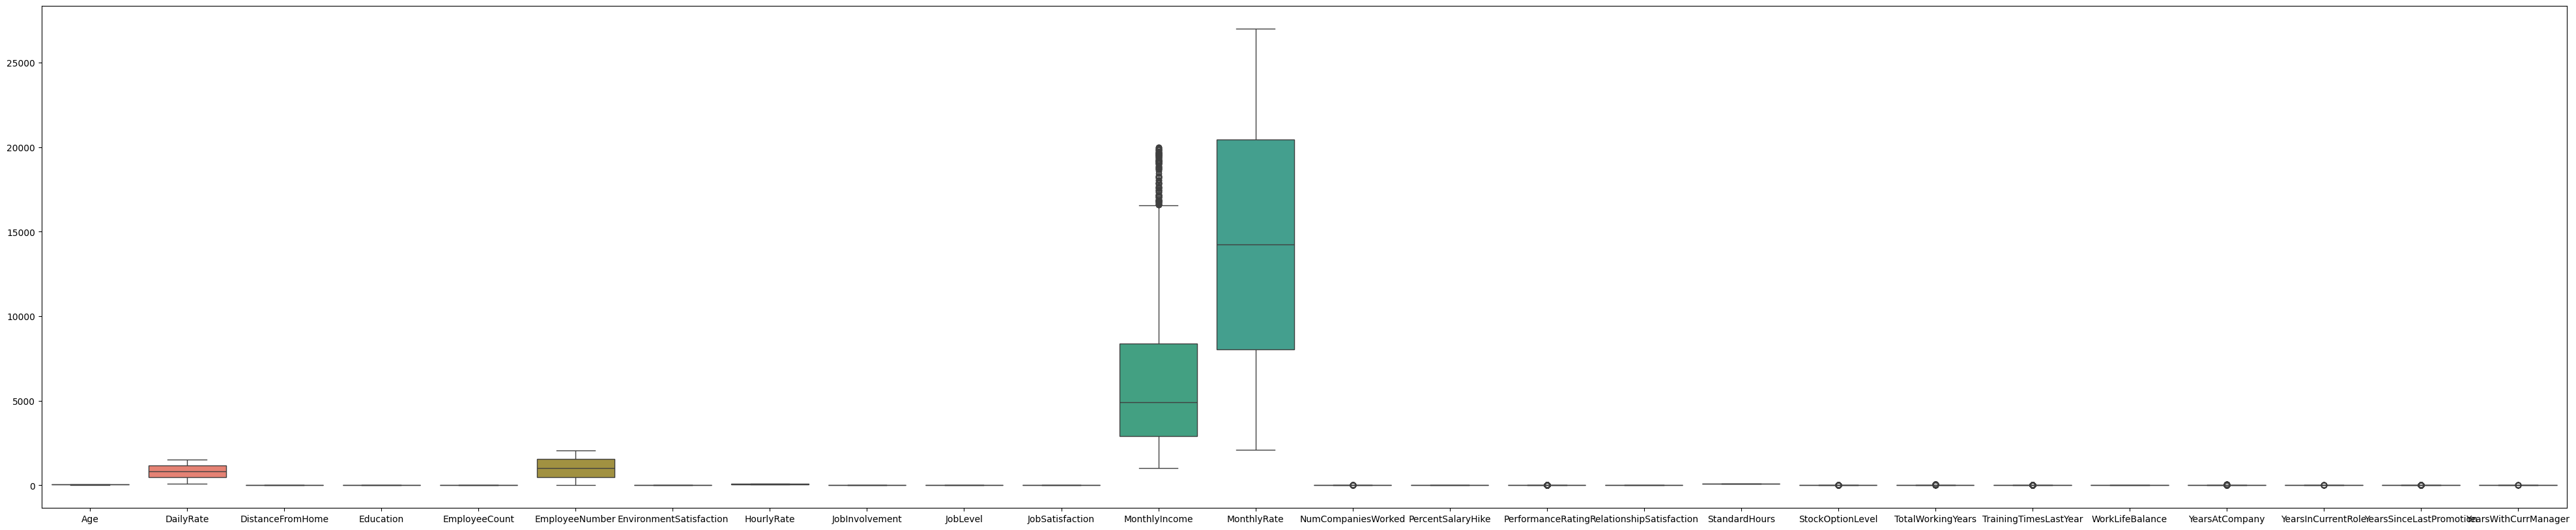

In [ ]:
plt.figure(figsize=(50, 10))
sns.boxplot(data)

1. What is the distribution of age among the employees in the organization?

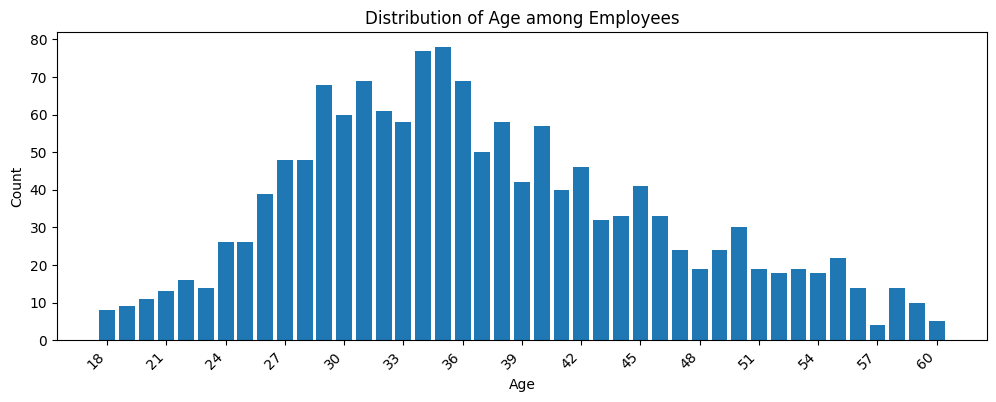

In [ ]:
min_age = data['Age'].min()
max_age = data['Age'].max()
min_age, max_age
# Define the number of bins and calculate the bin width
num_bins = 10
bin_width = (max_age - min_age) / num_bins

ages = data['Age']

# Calculate the count of each age
unique_ages, counts = np.unique(ages, return_counts=True)

# Plotting the counts per age
plt.figure(figsize=(12,4))
plt.bar(unique_ages, counts)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age among Employees')

# Set x-ticks for every age in the range 18 to 60
plt.xticks(range(18, 61,3), rotation= 45, ha='right')

plt.show()

Observation:

From age 18 to 29, there is an increase in the number of employees increase in age.
Ages between 29 to around age 40 form the core of the organization with the highest number of employees per age.
From Age 42 onwards, there is a general decline in number of employees with increase in age.

2. Is there a significant difference in attrition rates between male and female employees?

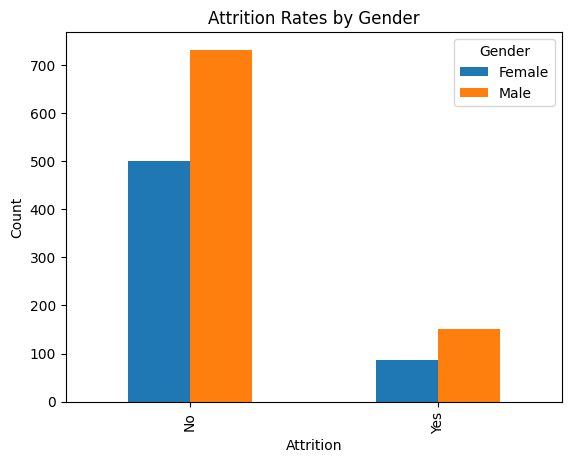

In [ ]:
# Create a contingency table of attrition and gender
contingency_table = pd.crosstab(data['Attrition'], data['Gender'])

# Plot the bar chart
contingency_table.plot(kind='bar')

# Set the plot labels and title
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Attrition Rates by Gender')

# Show the plot
plt.show()


Observation:

Based on the bar chart, there is no clear indication that the gender affects attrition

3. How does the distance from home to the office impact employee attrition?

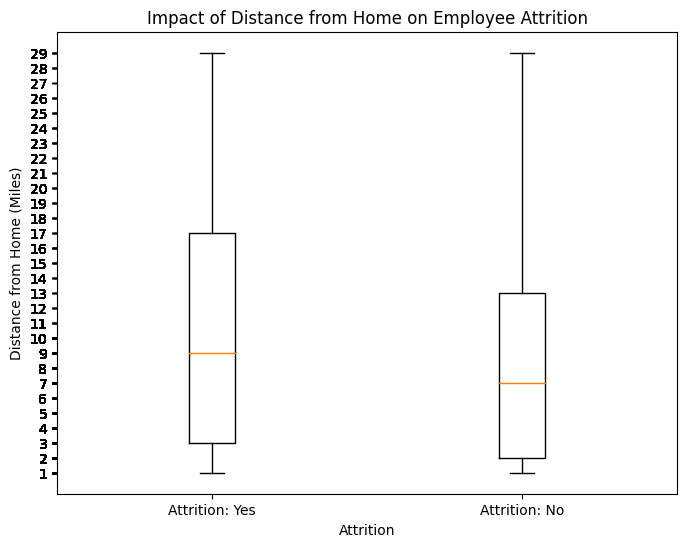

In [ ]:
# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot([data[data['Attrition'] == 'Yes']['DistanceFromHome'], data[data['Attrition'] == 'No']['DistanceFromHome']], labels=['Attrition: Yes', 'Attrition: No'])
plt.xlabel('Attrition')
plt.ylabel('Distance from Home (Miles)')
plt.title('Impact of Distance from Home on Employee Attrition')
plt.yticks(data['DistanceFromHome'], data['DistanceFromHome'])
plt.show()

Observation:

There is a slight difference in the mean distance from home for the difference attrition outcomes, with YES having 9 and NO 7
Both groups have a minimum distance value of 1 mile and a maximum value of 29 miles
The first quartile values have only one mile separating them with YES at 3 and NO at 2
There is a huge difference in the third quartile with YES at 17 and NO 13

4. What is the relationship between education level and job level within the organization?

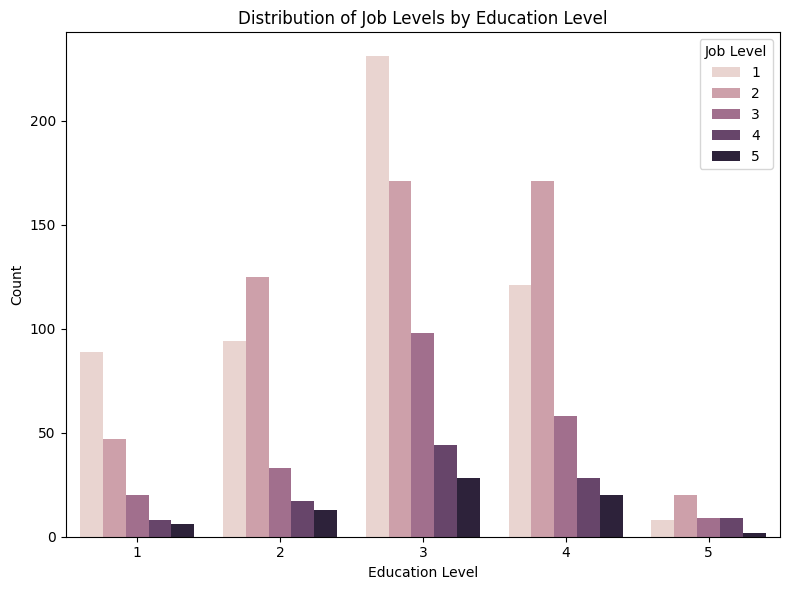

In [ ]:
# Create a stacked bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data, x='Education', hue='JobLevel')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Job Levels by Education Level')
plt.legend(title='Job Level')
plt.tight_layout()
plt.show()



Observation:

Education level 3 is has the most employees in the various job levels in the company
Education level 6 has the least employees in the various levels in the company
Further analysis is required to identify the possible relationship between the two variables

Feature Engineering
What Are Our Data Quality Issues?

Data Quality Issue #1:
Data Quality Issue #2:
Data Quality Issue #3:
Categorical DataType: Categorical columns are of the object datatype. We will use Ordinal Encoding to convert this columns to a form that will serve the model better

Unnecessary Columns: We've identified four columns that could create bias in our model. This columns should be dropped.

Standardization: The dataset will be standardize to a mean of zero

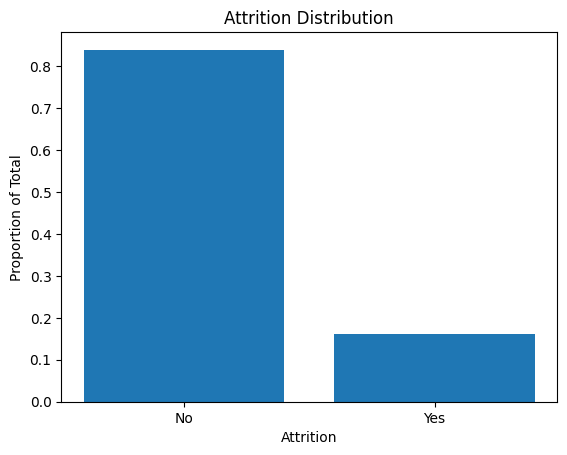

In [ ]:

attrition_counts = data['Attrition'].value_counts(normalize=True)

# Create a bar chart
plt.bar(attrition_counts.index, attrition_counts.values)

# Add labels and title
plt.xlabel('Attrition')
plt.ylabel('Proportion of Total')
plt.title('Attrition Distribution')

# Display the plot
plt.show()

In [ ]:
#no needed columns are doroped
drop_columns = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
model_data = data.copy()
model_data = model_data.drop(drop_columns, axis=1)

In [ ]:
#Categorical Data

#Encode the target column Attrition such that Yes is 1 and No is 0
model_data['Attrition'] = np.where(model_data['Attrition'] == 'Yes', 1, 0)

shuffle_df = shuffle(model_data, random_state=42)

#split the dataset
x, y = shuffle_df.drop('Attrition', axis=1), shuffle_df['Attrition']
y = y.ravel()
encoder = OrdinalEncoder()
s = (x.dtypes=='object')
object_cols = list(s[s].index)
x[object_cols] = encoder.fit_transform(x[object_cols])

In [ ]:
#Standardization

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

Model Building

Train and Test

In [ ]:
# Split the dataset into train and test sets, maintaining the class distribution
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

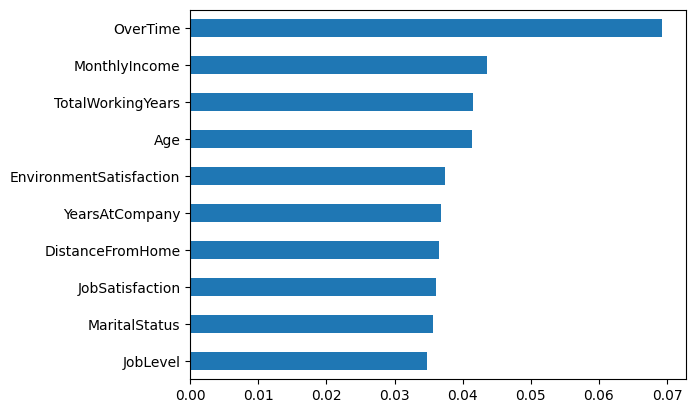

In [ ]:
#Feature Importance
model = ExtraTreesClassifier()
model.fit(x, y)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')
plt.show()


Model Selection
We will use the F1 score as our main evaluation since it evaluates the balance between precision and recall

In [ ]:
clf = [
    AdaBoostClassifier(),
    BaggingClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    CalibratedClassifierCV(LinearSVC()),
    XGBClassifier(),
    KNeighborsClassifier(),
    LGBMClassifier(),
    LogisticRegression()

]

In [ ]:
clf_columns = []
clf_compare = pd.DataFrame(columns=clf_columns)

row_index = 0

for alg in clf:
    pred = alg.fit(X_train, y_train).predict(X_test)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index,'Classifier'] = clf_name;
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4);
    clf_compare.loc[row_index, 'Test f1_score'] = round(f1_score(y_test, pred), 4);
    row_index+=1

clf_compare.sort_values(by = ['Test f1_score'], ascending = False, inplace = True)
clf_compare

[LightGBM] [Info] Number of positive: 187, number of negative: 989
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1151
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.159014 -> initscore=-1.665586
[LightGBM] [Info] Start training from score -1.665586


,Classifier,Train Accuracy,Test f1_score
8,LogisticRegression,0.8741,0.5897
0,AdaBoostClassifier,0.8988,0.5867
4,CalibratedClassifierCV,0.8707,0.5352
3,GaussianNB,0.7662,0.4874
7,LGBMClassifier,1.0000,0.4478
5,XGBClassifier,1.0000,0.4286
1,BaggingClassifier,0.9889,0.3836
2,RandomForestClassifier,1.0000,0.3333
6,KNeighborsClassifier,0.8724,0.2667


We see that the f1_score is generally low. So we'll apply oversampling to overcome this.

Applying oversampling

In [ ]:
dataf1 = data.copy()
dataf1 = dataf1.drop(drop_columns, axis=1)
dataf1['Attrition'] = np.where(dataf1['Attrition'] == 'Yes', 1, 0)

dataf1 = shuffle(dataf1, random_state=42)

#split the dataset
x, y = dataf1.drop('Attrition', axis=1), dataf1['Attrition']
y = y.ravel()
encoder = OrdinalEncoder()
s = (x.dtypes=='object')
object_cols = list(s[s].index)
x[object_cols] = encoder.fit_transform(x[object_cols])

Apply SMOTE algorithm

In [ ]:
from imblearn.over_sampling import SMOTE
X,y=SMOTE(sampling_strategy=1, random_state=0).fit_resample(x, y)

Divide data into training and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:
clf_columns = []
clf_compare = pd.DataFrame(columns=clf_columns)

row_index = 0

for alg in clf:
    pred = alg.fit(X_train, y_train).predict(X_test)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index,'Classifier'] = clf_name;
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4);
    clf_compare.loc[row_index, 'Test f1_score'] = round(f1_score(y_test, pred), 4);
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4);
    row_index+=1

clf_compare.sort_values(by = ['Test f1_score'], ascending = False, inplace = True)
clf_compare

[LightGBM] [Info] Number of positive: 980, number of negative: 992
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2896
[LightGBM] [Info] Number of data points in the train set: 1972, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496957 -> initscore=-0.012171
[LightGBM] [Info] Start training from score -0.012171


,Classifier,Train Accuracy,Test f1_score,Test Accuracy
5,XGBClassifier,1.0000,0.9383,0.9393
2,RandomForestClassifier,1.0000,0.9317,0.9332
0,AdaBoostClassifier,0.9128,0.9215,0.9211
7,LGBMClassifier,1.0000,0.9202,0.9211
1,BaggingClassifier,0.9939,0.9087,0.9109
6,KNeighborsClassifier,0.8448,0.7698,0.7409
3,GaussianNB,0.7520,0.7440,0.7186
8,LogisticRegression,0.7145,0.6844,0.6640
4,CalibratedClassifierCV,0.6242,0.6365,0.5931


We adopt the XGBoost classifier which has a f1_score of 0.9303 and accuracy of 93.12%

Hyperparameter Tuning

In [ ]:
params = {
    "n_estimators": [10, 20, 50, 100],
    "learning_rate": [0.01, 0.05, 0.1, 0.2]
}

# Create an XGBClassifier object
clf = XGBClassifier()

# Create a GridSearchCV object
grid = GridSearchCV(clf, params, cv=5)

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid.best_params_)

Best hyperparameters: {'learning_rate': 0.05, 'n_estimators': 100}


In [ ]:
y_pred = grid.predict(X_test)
print(f"Parameterized model accuracy: {accuracy_score(y_test, y_pred)}")

Parameterized model accuracy: 0.9331983805668016


In [ ]:
print(f"Parameterized model f1_score: {f1_score(y_test, y_pred)}")

Parameterized model f1_score: 0.9327902240325866


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       241
           1       0.96      0.91      0.93       253

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



Feature Importance for XGBoost

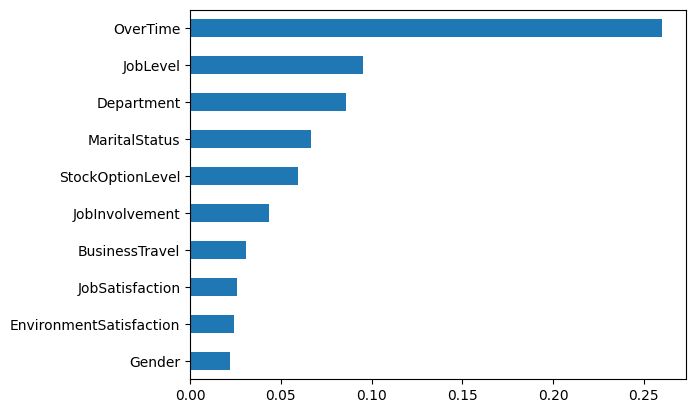

In [ ]:
xgboost = XGBClassifier(learning_rate = 0.2, n_estimators = 100)
xgboost.fit(X_train, y_train)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(xgboost.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')
plt.show()

In [ ]:
y_pred = xgboost.predict(X_test)
print(f"Final XGBoost model accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Final XGBoost model f1_score: {f1_score(y_test, y_pred)}")
report = classification_report(y_test, y_pred)
print(report)

Final XGBoost model accuracy: 0.9311740890688259
Final XGBoost model f1_score: 0.9306122448979592
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       241
           1       0.96      0.90      0.93       253

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494

